* Nama          : M. Eric Chaniago
* Email         : akkitherythm@gmail.com
* ID Dicoding   : 

# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

#### **Dataset: Beverage Sales**

**Deskripsi** <br>
Dataset ini dibuat untuk mensimulasikan pola penjualan yang realistis dalam industri minuman, dengan menyoroti faktor-faktor penting seperti preferensi regional, fluktuasi musiman, dan segmentasi pelanggan. Dataset ini mencakup transaksi **Business-to-Business (B2B)** dan **Business-to-Consumer (B2C)**, sehingga dapat digunakan untuk berbagai analisis. <br><br>

**Fitur Dataset**
| Nama Fitur     | Deskripsi |
|---------------|-----------|
| `Order_ID`     | ID unik untuk setiap pesanan, yang mengelompokkan beberapa produk dalam satu pesanan. |
| `Customer_ID`  | ID unik untuk setiap pelanggan, membedakan pembeli individu. |
| `Customer_Type`| Jenis pelanggan, apakah **B2B** (bisnis ke bisnis) atau **B2C** (bisnis ke konsumen). |
| `Product`      | Nama produk yang dibeli, seperti "Coca-Cola" atau "Erdinger Weißbier". |
| `Category`     | Kategori produk, seperti "Soft Drinks" atau "Alcoholic Beverages". |
| `Unit_Price`   | Harga per unit dari produk. |
| `Quantity`     | Jumlah unit produk yang dibeli dalam pesanan tersebut. |
| `Discount`     | Diskon yang diberikan pada produk (misalnya 0.1 untuk 10%). Diskon hanya diberikan kepada pelanggan **B2B**. |
| `Total_Price`  | Total harga produk setelah diskon diterapkan. |
| `Region`       | Wilayah tempat pelanggan berada, seperti "Bayern" atau "Berlin". |
| `Order_Date`   | Tanggal pesanan dibuat. |

**Sumber Dataset**
Dataset ini diperoleh dari Kaggle:  
🔗 [Beverage Sales Dataset - Kaggle](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [15]:
# Data Manipulation & Visualization Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Data Preprocessing
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder
)

# Clustering Evaluation
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Clustering Algorithms
from sklearn.cluster import KMeans

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Feature Selection
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [23]:
df_sales1 = pd.read_csv("Dataset_clustering.csv")
df_sales1.head(5)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### **1. Memahami Struktur Data**

In [25]:
df_sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [45]:
# Shrinking the dataset
df_sales = df_sales1.sample(n=7000, random_state=69, ignore_index=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       7000 non-null   object 
 1   Customer_ID    7000 non-null   object 
 2   Customer_Type  7000 non-null   object 
 3   Product        7000 non-null   object 
 4   Category       7000 non-null   object 
 5   Unit_Price     7000 non-null   float64
 6   Quantity       7000 non-null   int64  
 7   Discount       7000 non-null   float64
 8   Total_Price    7000 non-null   float64
 9   Region         7000 non-null   object 
 10  Order_Date     7000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 601.7+ KB


**Insight**
- Jumlah Data: 8.999.910 baris, 11 kolom.  
- Numerikal (4): `Unit_Price`, `Quantity`, `Discount`, `Total_Price`.  
- Kategorikal (7): `Order_ID`, `Customer_ID`, `Customer_Type`, `Product`, `Category`, `Region`, `Order_Date`.  

#### **2. Menangani Missing Value**

In [27]:
# Check Missing Value
print("Sum Of Missing Value:")
df_sales.isnull().sum()

Sum Of Missing Value:


Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

**Insight**
- Dataframes tidak memiliki nilai yang hilang, artinya datanya cukup bersih dan bsia masuk ke proses selanjutnya

#### **3. Analisis Distribusi dan Korelasi**

In [28]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [29]:
print("📊 DESCRIPTIVE STATISTICS")
df_sales.describe().style.background_gradient(cmap='Blues')

📊 DESCRIPTIVE STATISTICS


,Unit_Price,Quantity,Discount,Total_Price
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,5.743500,22.979857,0.029821,129.305250
std,14.452671,26.819165,0.044728,488.512727
min,0.340000,1.000000,0.000000,0.380000
25%,1.060000,6.000000,0.000000,8.210000
50%,1.770000,11.000000,0.000000,20.635000
75%,3.170000,31.000000,0.050000,69.272500
max,144.470000,100.000000,0.150000,10008.850000


📈 DISTRIBUTION VISUALIZATION: HISTOGRAMS


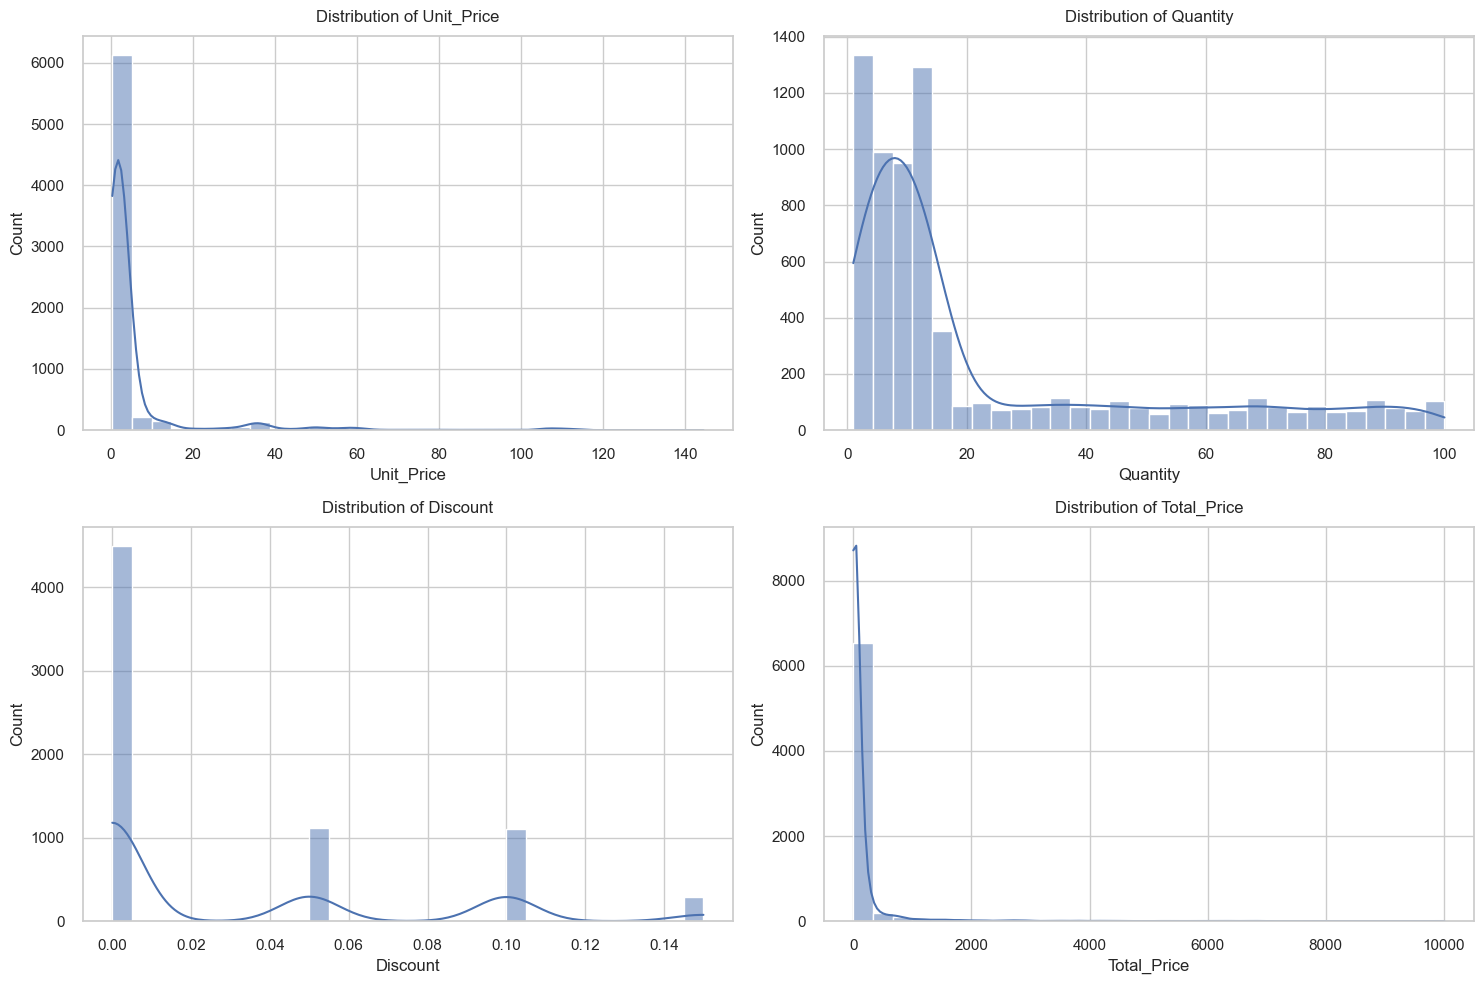

In [30]:
print("📈 DISTRIBUTION VISUALIZATION: HISTOGRAMS")
num_cols = df_sales.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=df_sales, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', pad=10)
    
plt.tight_layout()
plt.show()

📦 DISTRIBUTION VISUALIZATION: BOXPLOTS


C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\142114976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\142114976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\142114976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\142114976.py:6:

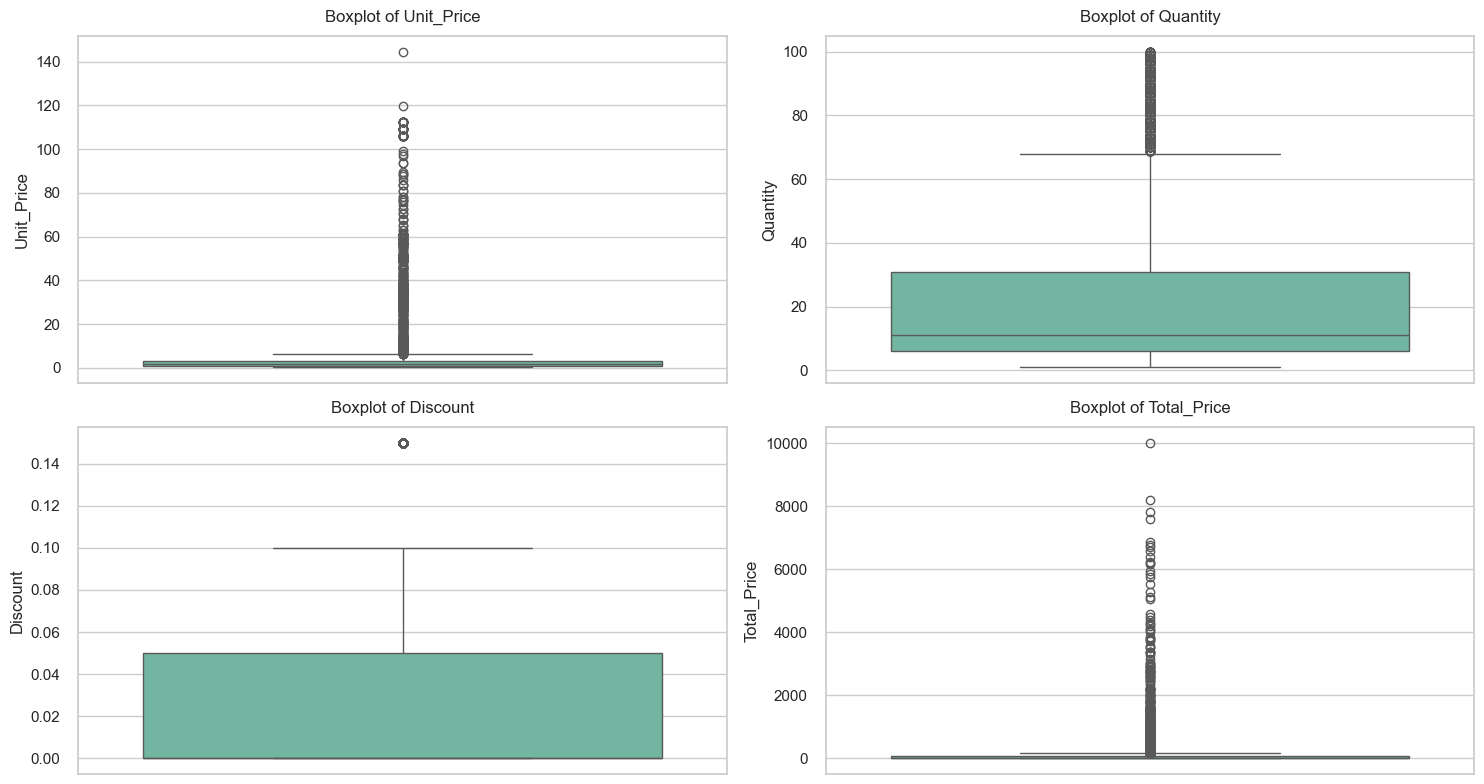

In [31]:
print("📦 DISTRIBUTION VISUALIZATION: BOXPLOTS")
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}', pad=10)
    
plt.tight_layout()
plt.show()

🔗 CORRELATION MATRIX


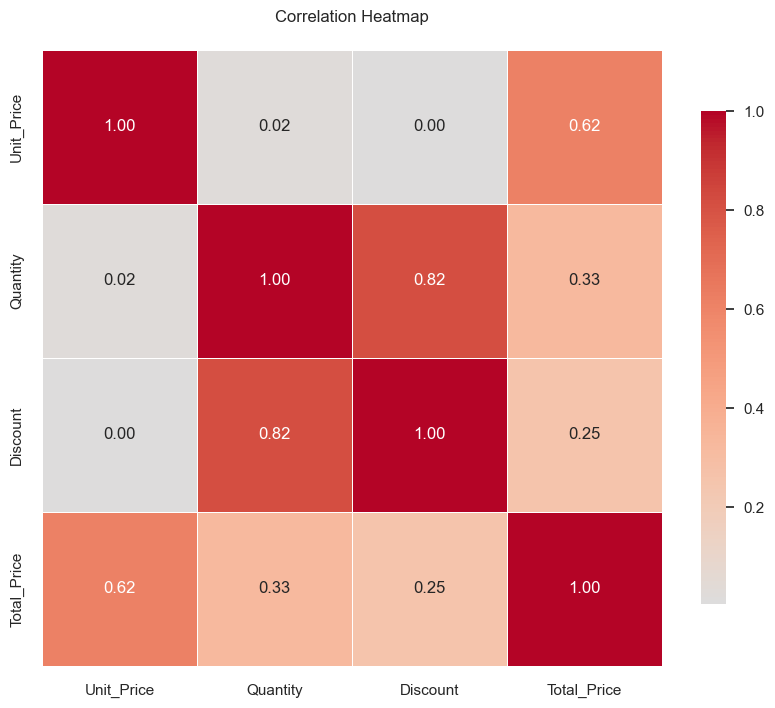

In [32]:
print("🔗 CORRELATION MATRIX")
corr_matrix = df_sales[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", 
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', pad=20)
plt.show()

🔄 PAIRWISE RELATIONSHIPS


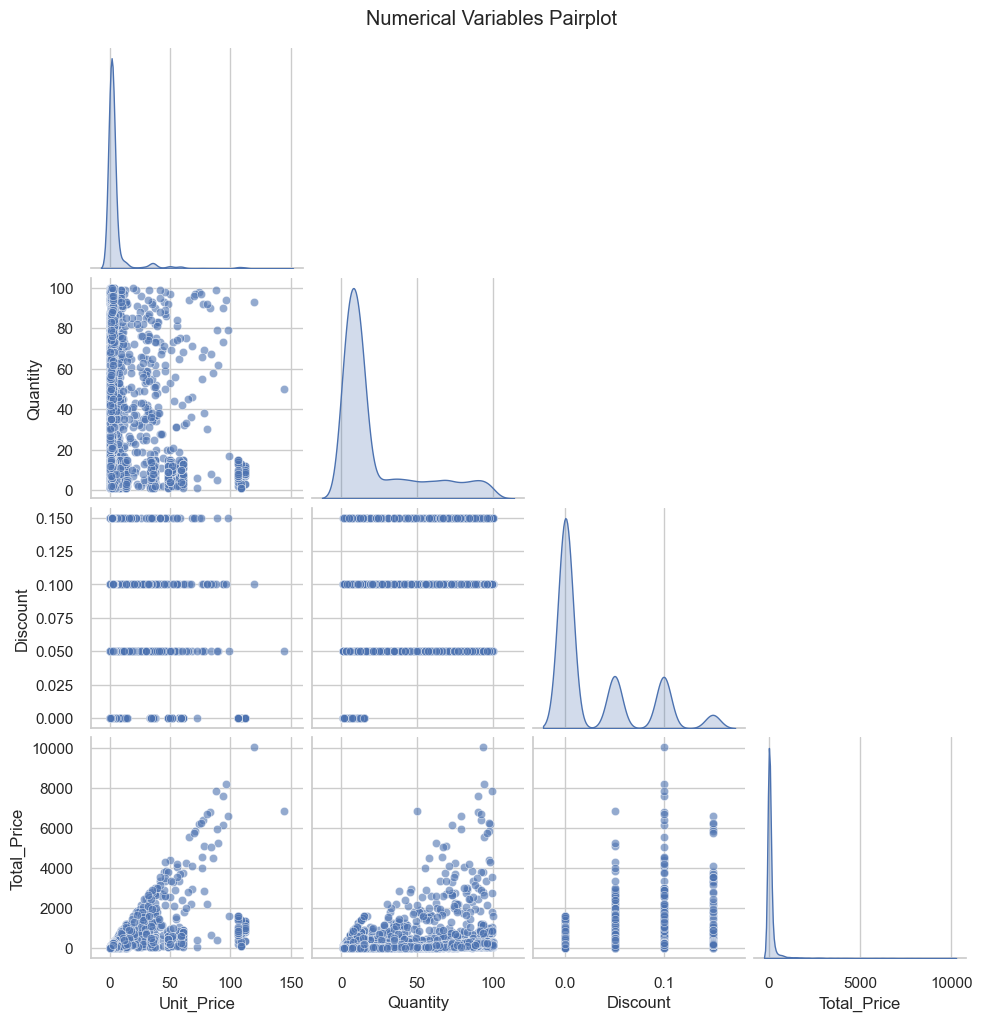

In [33]:
print("🔄 PAIRWISE RELATIONSHIPS")
sns.pairplot(df_sales[num_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Numerical Variables Pairplot', y=1.02)
plt.show()

#### **4. Visualisasi Data**

In [34]:
# Set visual style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [35]:
print("📋 CATEGORICAL VARIABLES SUMMARY")
cat_cols = ['Customer_Type', 'Product', 'Category', 'Region']

# Display value counts for each categorical column
for col in cat_cols:
    print(f"\n🔍 {col} Distribution:")
    display(df_sales[col].value_counts().to_frame().style.background_gradient(cmap='Blues'))

📋 CATEGORICAL VARIABLES SUMMARY

🔍 Customer_Type Distribution:


,count
Customer_Type,
B2C,4497
B2B,2503



🔍 Product Distribution:


,count
Product,
Passion Fruit Juice,282
Hohes C Orange,279
Granini Apple,274
Tomato Juice,257
Rauch Multivitamin,238
Mango Juice,234
Cranberry Juice,226
Volvic,213
San Pellegrino,206



🔍 Category Distribution:


,count
Category,
Juices,1790
Alcoholic Beverages,1758
Water,1745
Soft Drinks,1707



🔍 Region Distribution:


,count
Region,
Schleswig-Holstein,475
Rheinland-Pfalz,460
Bayern,453
Saarland,450
Thüringen,446
Niedersachsen,446
Nordrhein-Westfalen,442
Mecklenburg-Vorpommern,437
Bremen,436


📊 CATEGORICAL DISTRIBUTION (COUNT PLOTS)


C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\1726555896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\1726555896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_8200\1726555896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
C:\Users\akkit\A

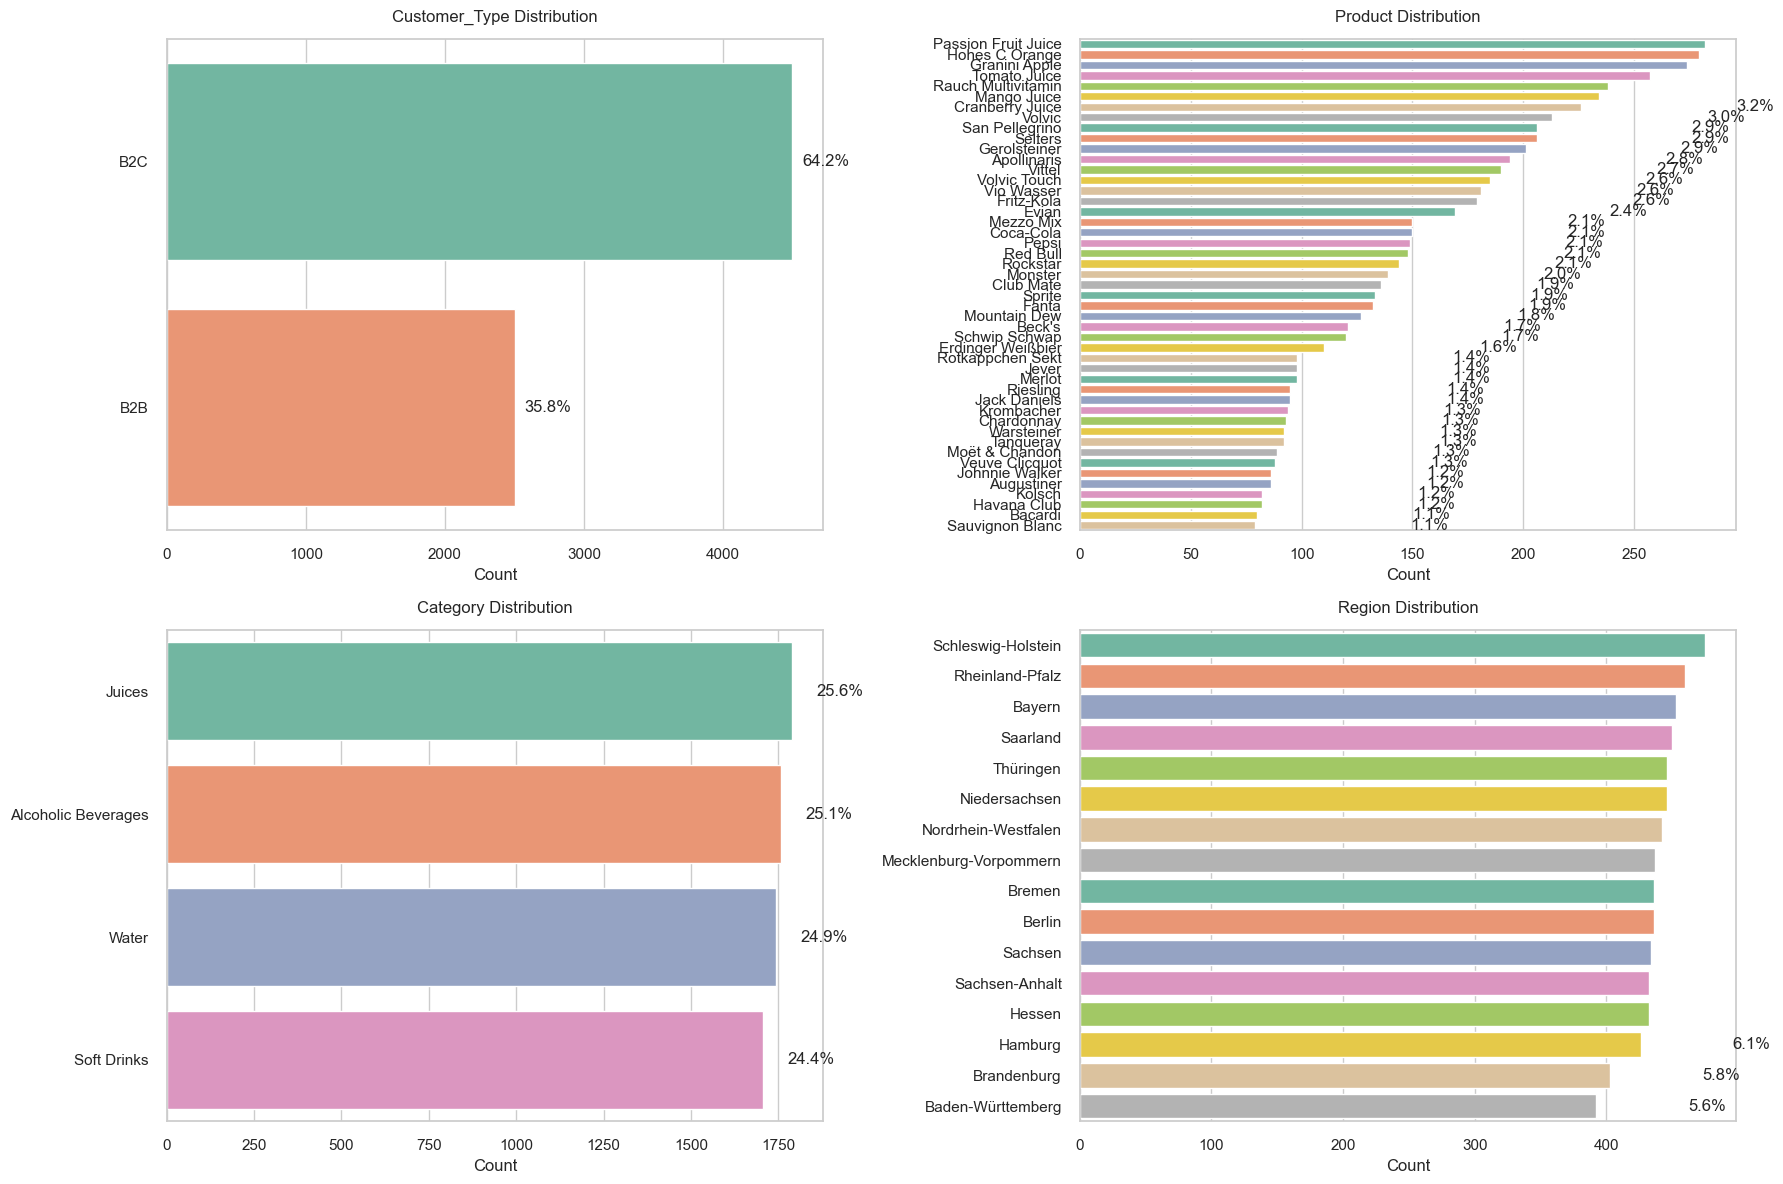

In [36]:
print("📊 CATEGORICAL DISTRIBUTION (COUNT PLOTS)")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    order = df_sales[col].value_counts().index
    sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
    axes[i].set_title(f'{col} Distribution', pad=12)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    
    # Add percentage annotations
    total = len(df_sales)
    for p in axes[i].patches:
        percentage = f'{100 * p.get_width()/total:.1f}%'
        x = p.get_width() + total*0.01
        y = p.get_y() + p.get_height()/2
        axes[i].annotate(percentage, (x, y), va='center')
    
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### **1. Menangani Missing Value**

In [37]:
# Check missing values
print("\n🔍 Missing Values:")
display(df_sales.isnull().sum())


🔍 Missing Values:


Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

**Insight**
- Tidak terdapat missing value pada dataframe, sehingga lanjyt ke proses berikutnya

#### **2. Menangani Data Duplikat**

In [38]:
print("🔎 Checking for duplicates...")
duplicate_count = df_sales.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows")

🔎 Checking for duplicates...
Found 0 duplicate rows


**Insight**
- Tidak terdapat baris data yang duplikat, maka tidak ada yang perlu dihapus. Lanjut ke tahap berikutnya

#### **3. Normalisasi dan Standarisasi**

In [46]:
# Initialize scalers
min_max_scaler = MinMaxScaler()  # For normalization (scaling to [0,1] range)
standard_scaler = StandardScaler()  # For standardization (mean=0, std=1)

In [47]:
# Apply MinMax normalization to 'Quantity' column
df_sales_normalized = df_sales.copy()
df_sales_normalized[['Quantity']] = min_max_scaler.fit_transform(df_sales_normalized[['Quantity']])
df_sales_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


In [52]:
# Apply Standard scaling to price columns
df_standardized = df_sales_normalized.copy()
df_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standardized[['Total_Price', 'Unit_Price']])
df_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325465,0.060606,0.00,-0.249807,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.348300,0.454545,0.10,-0.204544,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.196760,0.727273,0.05,0.146997,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.211983,0.292929,0.05,-0.108347,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334460,0.020202,0.00,-0.259122,Hessen,2023-04-28


**Insight**
- Dilakukan MinMax Normalization pada kolom `quantity`
- Pada kolom `Total_Price` dan `Unit_Price` dilakukan standarisasi

#### **4. Deteksi dan Penanganan Outlier**

In [ ]:
df_cleaned = df_standardized.copy()
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 
                 'Total_Price']

📊 Detecting outliers...


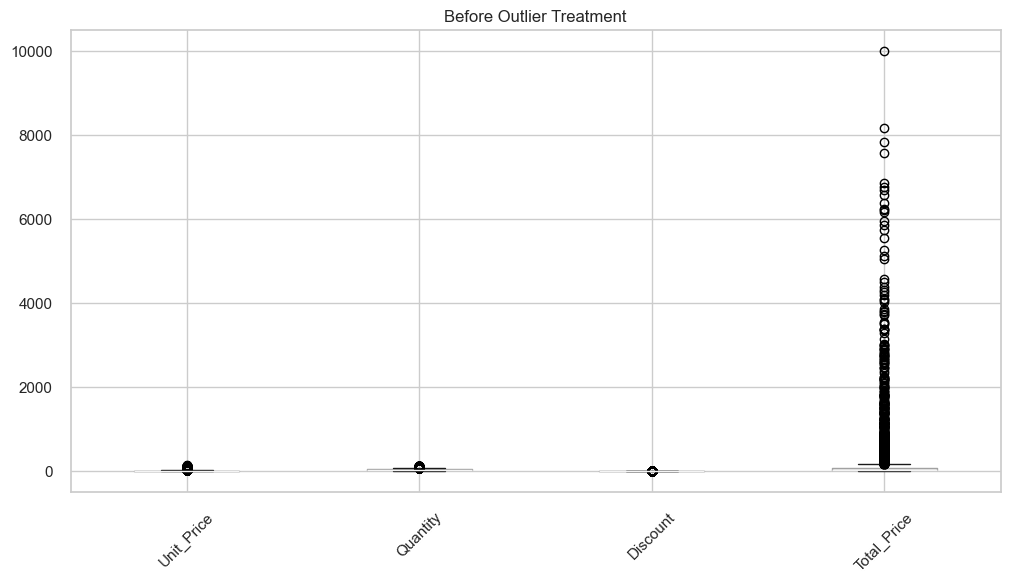

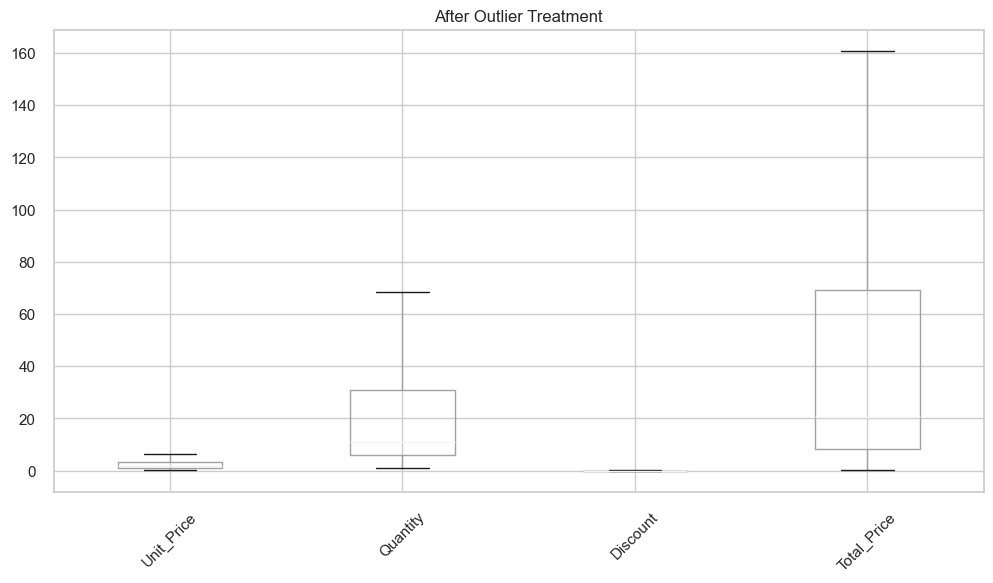

✅ Outliers treated using IQR capping method


In [ ]:
# OUTLIER DETECTION & TREATMENT
# =================================
print("📊 Detecting outliers...")

# Before treatment
plt.figure(figsize=(12,6))
df_sales[numerical_cols].boxplot()
plt.title('Before Outlier Treatment')
plt.xticks(rotation=45)
plt.show()

# IQR Method
for col in numerical_cols:
    Q1 = df_sales[col].quantile(0.25)
    Q3 = df_sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_sales[col] = np.clip(df_sales[col], lower_bound, upper_bound)

# After treatment
plt.figure(figsize=(12,6))
df_sales[numerical_cols].boxplot()
plt.title('After Outlier Treatment')
plt.xticks(rotation=45)
plt.show()

print("✅ Outliers treated using IQR capping method")

**Insight**
- Sebelum outlier treatment, Total_Price memiliki banyak outlier ekstrem yang mendominasi skala.
- Setelah outlier treatment, distribusi data lebih seimbang dan skala antar variabel lebih seragam.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.